# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

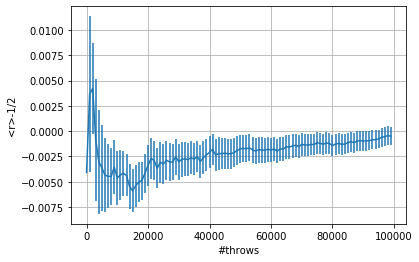

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
np.random.seed(0)     # Fixing random seed for reproducibility
r = np.random.rand(M) # U[0,1) uniform distribution
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += r[k]
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

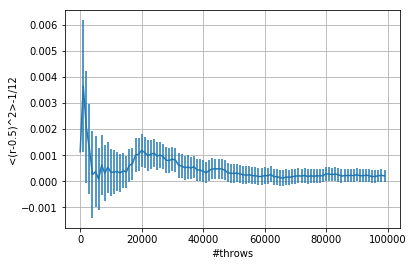

In [2]:
# Continue using variables and functions of the previous code cell
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?